In [155]:
import numpy as np
import pandas as pd

In [156]:
df= pd.read_csv('bank-market.csv')

In [157]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [159]:
#getting columns with categorical data
cat_cols = [c for c in df.columns if df[c].dtypes=='O']  # Make lists with categorical and numerical variables:
num_cols = [c for c in df.columns if df[c].dtypes!='O']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

# Conversion to numerics

### Converting job into binary 

In [160]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [161]:
df['job'] = df['job'].map({'management':1, 'blue-collar':2, 'technician':3, 'admin.':4, 'services':5, 'retired':6, 'self-employed':7, 'entrepreneur':8, 'unemployed':9, 'housemaid':10, 'student':11, 'unknown':12}) # Re-code the 'marital' parameter as binary:

### Converting marital into binary 

In [162]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [163]:
Counts_val = df['marital'].value_counts()
mask = df['marital'].isin(Counts_val[Counts_val<1197].index)
df['marital'][mask] = 'other'
print(pd.value_counts(df['marital']))
pd.options.mode.chained_assignment = None #to avaoid error

married    2797
other      1724
Name: marital, dtype: int64


In [164]:
df['marital'] = df['marital'].map({'married':1, 'other':0}) # Re-code the 'marital' parameter as binary:

### Converting education into binary 

In [165]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [166]:
df['education'] = df['education'].map({'secondary':2, 'tertiary':3, 'primary':1, 'unknown':0}) # Re-code the 'education' parameter as binary:

### Converting default into binary 

In [167]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [168]:
df['default'] = df['default'].map({'yes':1, 'no':0}) # Re-code the 'default' parameter as binary:

### Converting housing into binary 

In [169]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [170]:
df['housing'] = df['housing'].map({'yes':1, 'no':0}) # Re-code the 'housing' parameter as binary:

### Converting loan into binary 

In [171]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [172]:
df['loan'] = df['loan'].map({'yes':1, 'no':0}) # Re-code the 'loan' parameter as binary:

### Converting contact into binary 

In [173]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [174]:
df['contact'] = df['contact'].map({'cellular':1, 'unknown':0, 'telephone':2}) # Re-code the 'contact' parameter as binary:

### Converting month into binary 

In [175]:
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [176]:
# Re-code the 'month' parameter as binary:
df['month'] = df['month'].map({'may':5, 'jul':7, 'aug':8, 'jun':6, 'nov':11, 'apr':4, 'feb':2, 'jan':1, 'oct':10, 'sep':9, 'mar':3, 'dec':12})

### Converting y into binary 

In [177]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [178]:
df['y'] = df['y'].map({'yes':1, 'no':0}) # Re-code the 'y' parameter as binary:

### Converting poutcome into binary 

In [179]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [180]:
df['poutcome'] = df['poutcome'].map({'unknown':0, 'failure':-1, 'other':0, 'success':1}) # Re-code the 'poutcome' parameter as binary:

In [181]:
df.poutcome.value_counts()

 0    3902
-1     490
 1     129
Name: poutcome, dtype: int64

# Logistic Regression

### Logistic Regression : Hold Out method (30%-70%)

In [182]:
X = df.drop('y', axis=1)

In [183]:
y = df['y']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.3, random_state=42)

In [186]:
from sklearn.linear_model import LogisticRegression  #import

In [187]:
modelLogR = LogisticRegression()     # object

In [188]:
modelLogR.fit(trainX,trainY)

C:\Users\Huzefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
preLogR = modelLogR.predict(testX)

In [190]:
from sklearn.metrics import classification_report, accuracy_score

In [191]:
accuracy_score(preLogR,testY)

0.8887251289609432

In [1]:
precision_score(preLogR,testY)

NameError: name 'precision_score' is not defined

In [192]:
print(classification_report(testY,preLogR))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.51      0.17      0.26       152

    accuracy                           0.89      1357
   macro avg       0.71      0.58      0.60      1357
weighted avg       0.86      0.89      0.86      1357



### Logistic Regression : Simple K-fold Method

In [193]:
# evaluate a logistic regression model using k-fold cross-validation
import numpy as np
import pandas as pd
#from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression

In [194]:
# Simple Kfold
kf1 = KFold(n_splits=10, random_state=42, shuffle=True)
# Stratified K-fold
Skf1 = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [195]:
scores_cv1_accuracy = cross_val_score(modelLogR, X, y, scoring='accuracy', cv=kf1, n_jobs=-1)
scores_cv1_precision = cross_val_score(modelLogR, X, y, scoring='precision', cv=kf1, n_jobs=-1)
scores_cv1_recall = cross_val_score(modelLogR, X, y, scoring='recall', cv=kf1, n_jobs=-1)


In [196]:
# --- Simple Kfold ---
print("Accuracy :",scores_cv1_accuracy.mean())
print("Precision :",scores_cv1_precision.mean())
print("Recall :",scores_cv1_recall.mean())


Accuracy : 0.8847589325831722
Precision : 0.49279054279054285
Recall : 0.1560202971416586


### Logistic Regression : Stratified K-fold method 

In [197]:
scores_skf1_accuracy = cross_val_score(modelLogR, X, y, scoring='accuracy', cv=Skf1, n_jobs=-1)
scores_skf1_precision = cross_val_score(modelLogR, X, y, scoring='precision', cv=Skf1, n_jobs=-1)
scores_skf1_recall = cross_val_score(modelLogR, X, y, scoring='recall', cv=Skf1, n_jobs=-1)

In [198]:
# --- stratified Kfold ----
print("Accuracy :",scores_skf1_accuracy.mean())
print("Precision :",scores_skf1_precision.mean())
print("Recall :",scores_skf1_recall.mean())

Accuracy : 0.8847613745140557
Precision : 0.5139573906485673
Recall : 0.15348330914368652


# KNN

### KNN : Hold Out method (30%-70%)


In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
modelKNN = KNeighborsClassifier(n_neighbors=12)

In [201]:
modelKNN.fit(trainX,trainY)

KNeighborsClassifier(n_neighbors=12)

In [202]:
preKNN = modelKNN.predict(testX)

C:\Users\Huzefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [203]:
from sklearn.metrics import classification_report

In [204]:
print(classification_report(testY,preKNN))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.50      0.15      0.23       152

    accuracy                           0.89      1357
   macro avg       0.70      0.57      0.59      1357
weighted avg       0.86      0.89      0.86      1357



### KNN : Simple K-fold Method 

In [205]:
# Simple Kfold
kf2 = KFold(n_splits=8, random_state=42, shuffle=True)
# Stratified K-fold
Skf2 = StratifiedKFold(n_splits=8, random_state=42, shuffle=True)


In [206]:
# --- Simple Kfold ---
scores_cv2_accuracy = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=kf2, n_jobs=-1)
scores_cv2_precision = cross_val_score(modelKNN, X, y, scoring='precision', cv=kf2, n_jobs=-1)
scores_cv2_recall = cross_val_score(modelKNN, X, y, scoring='recall', cv=kf2, n_jobs=-1)


In [207]:
# --- Simple Kfold ---
print("Accuracy :",scores_cv2_accuracy.mean())
print("Precision :",scores_cv2_precision.mean())
print("Recall :",scores_cv2_recall.mean())

Accuracy : 0.8867479439632259
Precision : 0.5513418571163136
Recall : 0.11926851478011112


### KNN : Stratified K-fold method 

In [208]:
# --- stratified Kfold ----
scores_skf2_accuracy = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=Skf2, n_jobs=-1)
scores_skf2_precision = cross_val_score(modelKNN, X, y, scoring='precision', cv=Skf2, n_jobs=-1)
scores_skf2_recall = cross_val_score(modelKNN, X, y, scoring='recall', cv=Skf2, n_jobs=-1)

In [209]:
# --- stratified Kfold ----
print("Accuracy :",scores_skf2_accuracy.mean())
print("Precision :",scores_skf2_precision.mean())
print("Recall :",scores_skf2_recall.mean())

Accuracy : 0.8852023984489822
Precision : 0.5125254953379953
Recall : 0.10174825174825175


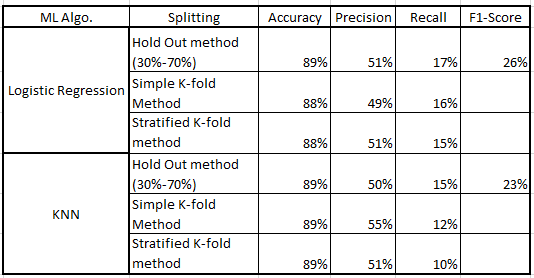